# TOSS - Multi-criteria decision analysis method considering reduced compensation in the evaluation of sustainability problems

## Illustrative example of usage

Import necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from toss import TOSS

from pyrepo_mcda import normalizations as norms
from pyrepo_mcda.additions import rank_preferences
from pyrepo_mcda import weighting_methods as mcda_weights
from pyrepo_mcda.mcda_methods import TOPSIS
from pyrepo_mcda import distance_metrics as dists
from pyrepo_mcda import correlations as corrs

Supporting functions for visualization

In [2]:
# bar (column) chart
def plot_barplot(df_plot, legend_title, comment = ''):
    """
    Visualization method to display column chart of alternatives rankings obtained with 
    different methods.
    Parameters
    ----------
        df_plot : DataFrame
            DataFrame containing rankings of alternatives obtained with different methods.
            The particular rankings are included in subsequent columns of DataFrame.
        title : str
            Title of the legend (Name of group of explored methods, for example MCDA methods or Distance metrics).
    
    Examples
    ----------
    >>> plot_barplot(df_plot, legend_title='MCDA methods')
    """
    step = 1
    list_rank = np.arange(1, len(df_plot) + 1, step)

    ax = df_plot.plot(kind='bar', width = 0.8, stacked=False, edgecolor = 'black', figsize = (10,5))
    ax.set_xlabel('Alternatives', fontsize = 12)
    ax.set_ylabel('Rank', fontsize = 12)
    ax.set_yticks(list_rank)

    ax.set_xticklabels(df_plot.index, rotation = 'horizontal')
    ax.tick_params(axis = 'both', labelsize = 12)
    y_ticks = ax.yaxis.get_major_ticks()
    ax.set_ylim(0, len(df_plot) + 1)

    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
    ncol=4, mode="expand", borderaxespad=0., edgecolor = 'black', title = legend_title, fontsize = 12)

    ax.grid(True, linestyle = '--')
    ax.set_axisbelow(True)
    plt.tight_layout()
    legend_title = legend_title.replace("$", "")
    legend_title = legend_title.replace(" ", "_")
    plt.show()


# radar chart
def plot_radar(data, title, comment = ''):
    """
    Visualization method to display rankings of alternatives obtained with different methods
    on the radar chart.

    Parameters
    -----------
        data : DataFrame
            DataFrame containing containing rankings of alternatives obtained with different 
            methods. The particular rankings are contained in subsequent columns of DataFrame.
        title : str
            Chart title

    Examples
    ----------
    >>> plot_radar(data, title)
    """
    fig=plt.figure()
    ax = fig.add_subplot(111, polar = True)

    for col in list(data.columns):
        labels=np.array(list(data.index))
        stats = data.loc[labels, col].values

        angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
        # close the plot
        stats=np.concatenate((stats,[stats[0]]))
        angles=np.concatenate((angles,[angles[0]]))
    
        lista = list(data.index)
        lista.append(data.index[0])
        labels=np.array(lista)

        ax.plot(angles, stats, '-o', linewidth=2)
    
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.set_rgrids(np.arange(1, data.shape[0] + 1, 2))
    ax.grid(True, linestyle = '--')
    ax.set_axisbelow(True)
    plt.legend(data.columns, bbox_to_anchor=(1.0, 0.95, 0.4, 0.2), loc='upper left')
    plt.title(title)
    plt.tight_layout()
    plt.show()


# heat maps with correlations
def draw_heatmap(df_new_heatmap, title, typ='rank'):
    """
    Visualization method to display heatmap with correlations of compared rankings generated using different methods
    
    Parameters
    ----------
        data : DataFrame
            DataFrame with correlation values between compared rankings
        title : str
            title of chart containing name of used correlation coefficient
    
    Examples
    ---------
    >>> draw_heatmap(df_new_heatmap, title)
    """
    plt.figure(figsize = (8, 5))
    sns.set(font_scale = 1.4)
    heatmap = sns.heatmap(df_new_heatmap, annot=True, fmt=".4f", cmap="RdYlGn",
                          linewidth=0.5, linecolor='w')
    plt.yticks(va="center")
    plt.xlabel('MCDA methods')
    plt.title('Correlation: ' + title)
    plt.tight_layout()
    title = title.replace("$", "")
    plt.show()

# Create dictionary class
class Create_dictionary(dict):
  
    # __init__ function
    def __init__(self):
        self = dict()
          
    # Function to add key:value
    def add(self, key, value):
        self[key] = value

Load decision matrix and criteria types in dataframe from CSV file

In [3]:
# Load decision matrix with performance values
df = pd.read_csv('dataset/data_general.csv', index_col='Auto')

In [4]:
df

,Hands-on lane-centering steering down to a stop,Hands-on lane-centering steering at lower speeds,Hands-on lane-centering steering at higher speeds,Hands-free lane-centering at lower speeds only,Horsepower,Top Speed,Seconds to 100km/h (60mph),Range (urban) [km],CO2 emission / g/km urban,TCO 50K km urban,TCO 100K km urban,Range (extra-urban) [km],CO2 emission / g/km extra-urban,TCO 50K km extra-urban,TCO 100K km extra-urban,Range (combined) [km],CO2 emission / g/km combined,TCO 50K km combined,TCO 100K km combined,Safety
Auto,,,,,,,,,,,,,,,,,,,,
2022 Alfa Romeo Giulia,1,1,1,0,280,240,5.6,590.918367,234.4160,51805.00000,58665.00000,813.342697,170.3104,49929.00000,54913.00000,665.632184,208.1040,51035.00000,57125.00000,0.98
2022 BMW 2 Series coupe and convertible,1,1,1,0,255,249,5.5,573.038674,216.4760,43680.00000,50015.00000,771.726191,160.7424,42049.00000,46753.00000,639.457460,193.9912,43022.00000,48699.00000,0.82
2022 BMW 2 Series Gran Coupe,1,1,1,0,228,249,4.9,509.897959,234.4160,41555.00000,48415.00000,722.109827,165.5264,39539.00000,44383.00000,594.880952,200.9280,40575.00000,46455.00000,0.94
2022 BMW 3 Series,1,1,1,1,255,249,5.2,628.191489,224.8480,48030.00000,54610.00000,853.323699,165.5264,46294.00000,51138.00000,702.976191,200.9280,47330.00000,53210.00000,0.97
2022 BMW 4 Series,1,1,1,1,255,249,3.8,627.523911,225.0872,52387.00000,58974.00000,853.323699,165.5264,50644.00000,55488.00000,702.976191,200.9280,51680.00000,57560.00000,0.97
2022 BMW i4,1,1,1,1,335,190,5.7,670.000000,0.0000,67834.17910,68773.35821,440.000000,0.0000,68325.11364,69755.22727,540.000000,0.0000,68060.27778,69225.55556,0.87
2022 Honda Accord,0,0,1,0,252,186,6.6,524.041160,255.7048,33603.00000,41086.00000,762.176871,175.8120,31265.00000,36410.00000,619.005525,216.4760,32455.00000,38790.00000,0.86
2022 Hyundai Elantra,1,1,1,0,147,249,5.3,659.269663,170.3104,24934.00000,29918.00000,858.135283,130.8424,23779.00000,27608.00000,738.050315,152.1312,24402.00000,28854.00000,0.79
2022 Hyundai Ioniq 5,1,1,1,0,168,185,8.5,435.000000,0.0000,46900.00000,47900.00000,270.000000,0.0000,47511.11111,49122.22222,340.000000,0.0000,47179.41176,48458.82353,0.88


In [5]:
df_data = df.iloc[:len(df) - 1, :]
# Load criteria types
types = df.iloc[len(df) - 1, :].to_numpy()

# matrix
matrix = df_data.to_numpy()

# calculate criteria weights using CRITIC weighting method
weights = mcda_weights.critic_weighting(matrix)

In [6]:
# sustainability coefficient from matrix calculated based on standard deviation from normalized matrix
n_matrix = norms.minmax_normalization(matrix, types)
s = np.sqrt(np.sum(np.square(np.mean(n_matrix, axis = 0) - n_matrix), axis = 0) / n_matrix.shape[0])

In [7]:
alt_names = [r'$A_{' + str(el) + '}$' for el in range(1, matrix.shape[0] + 1)]
col_names = [r'$C_{' + str(el) + '}$' for el in range(1, matrix.shape[1] + 1)]

# Save CRITIC weights to CSV file
df_weights_CRITIC = pd.DataFrame(weights.reshape(1, -1), index = ['Weight CRITIC'], columns = col_names)

Display criteria weights calculated using CRITIC method

In [8]:
df_weights_CRITIC

,$C_{1}$,$C_{2}$,$C_{3}$,$C_{4}$,$C_{5}$,$C_{6}$,$C_{7}$,$C_{8}$,$C_{9}$,$C_{10}$,$C_{11}$,$C_{12}$,$C_{13}$,$C_{14}$,$C_{15}$,$C_{16}$,$C_{17}$,$C_{18}$,$C_{19}$,$C_{20}$
Weight CRITIC,0.082653,0.082653,0.078698,0.06393,0.033324,0.037267,0.068506,0.051556,0.048263,0.033452,0.032696,0.045185,0.046531,0.033945,0.033304,0.0426,0.046682,0.033661,0.032922,0.072172


In [9]:
# Save s coefficient for each criterion to CSV file
df_s = pd.DataFrame(s.reshape(1, -1), index = ['Sust coeff'], columns = col_names)

Diaplay s coefficient determined for each criterion

In [10]:
df_s

,$C_{1}$,$C_{2}$,$C_{3}$,$C_{4}$,$C_{5}$,$C_{6}$,$C_{7}$,$C_{8}$,$C_{9}$,$C_{10}$,$C_{11}$,$C_{12}$,$C_{13}$,$C_{14}$,$C_{15}$,$C_{16}$,$C_{17}$,$C_{18}$,$C_{19}$,$C_{20}$
Sust coeff,0.392677,0.392677,0.349927,0.349927,0.229269,0.257011,0.27369,0.272273,0.3223,0.226433,0.22638,0.270705,0.313543,0.227354,0.226506,0.245903,0.314366,0.2268,0.226233,0.379995


Calculate preference values and rankings of evaluated alternatives using TOSS method and classical TOPSIS method for comparison

In [11]:
# Initialize TOSS method object
toss = TOSS(normalization_method=norms.minmax_normalization)

# Create dataframe for results
rank_results = pd.DataFrame(index=alt_names)

# TOSS
pref_toss = toss(matrix, weights, types, s_coeff = s)
rank_toss = rank_preferences(pref_toss, reverse = True)

# TOPSIS - for comparison
topsis = TOPSIS(normalization_method=norms.minmax_normalization, distance_metric=dists.euclidean)
pref_t = topsis(matrix, weights, types)
rank_t = rank_preferences(pref_t, reverse = True)

rank_results['TOSS pref'] = pref_toss
rank_results['TOPSIS pref'] = pref_t
rank_results['TOSS rank'] = rank_toss
rank_results['TOPSIS rank'] = rank_t

rank_results = rank_results.rename_axis('Ai')

In [12]:
rank_results

,TOSS pref,TOPSIS pref,TOSS rank,TOPSIS rank
Ai,,,,
$A_{1}$,0.655808,0.632222,6,6
$A_{2}$,0.609860,0.585528,10,10
$A_{3}$,0.642763,0.621182,8,8
$A_{4}$,0.743420,0.713828,2,2
$A_{5}$,0.751351,0.723642,1,1
$A_{6}$,0.710197,0.684249,3,3
$A_{7}$,0.437062,0.417708,18,18
$A_{8}$,0.620254,0.606189,9,9
$A_{9}$,0.577782,0.568538,16,16


In [13]:
# column figure 2-colored
rank_results = rank_results.drop(columns = ['TOSS pref', 'TOPSIS pref'])
rank_results = rank_results.rename(columns={"TOSS rank": "TOSS", "TOPSIS rank": "TOPSIS"})

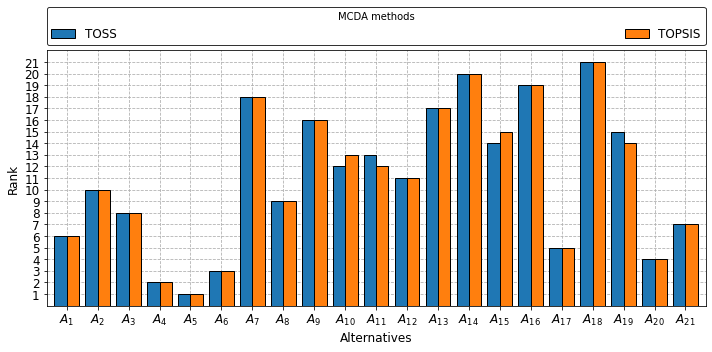

In [14]:
plot_barplot(rank_results, 'MCDA methods')

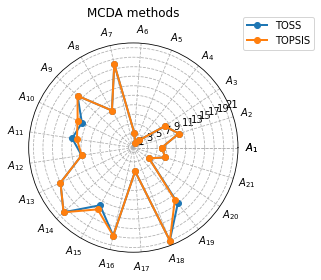

In [15]:
plot_radar(rank_results, 'MCDA methods')